### Andrew Dunn, Katherine Dumais, Kathryn Link-Oberstar, Lee-Or Bentovim

#### Summary of initial feature engineering and model testing for checkpoint 2

This analysis runs after we load, clean, and generate additional variables in load_data.py, and initially explored the data in exploratory_analysis.ipynb. This document summarizes the best performing models of the different types that we evaluated. A complete documentation of our research into different models can be found in these notebooks:
- [Logistic Regression](https://github.com/andrewjtdunn/Costa-Rican-Household-Poverty-Level-Prediction/blob/main/Logistic%20Regression-final.ipynb)
- [K-Nearest Neigbors](https://github.com/andrewjtdunn/Costa-Rican-Household-Poverty-Level-Prediction/blob/main/knn.ipynb)
- [Naive Bayes](https://github.com/andrewjtdunn/Costa-Rican-Household-Poverty-Level-Prediction/blob/main/Naive_Bayes.ipynb)
- [Random Forest](https://github.com/andrewjtdunn/Costa-Rican-Household-Poverty-Level-Prediction/blob/main/Random_Forest.ipynb)


### Outline of Notebook
**[1. Project Set-Up](#project-set-up)** \
*[1.1 Load Packages and Data](#1.1-load-packages-and-data)* \
*[1.2 Feature Engineering](#1.2-feature-engineering)* \
\
**[2. Model Testing](#2.-model-testing)** \
*[2.1 Random Forest](#2.1-random-forest)* \
*[2.2 Naive Bayes](#2.2-naive-bayes)* \
*[2.3 K Nearest Neighbors](#2.3-k-nearest-neighbors)* \
*[2.4 Logistic Regression](#2.4-logistic-regression)* \
\
**[3. Discussion](#3-discussion)** \
\
**[4. Next Steps](#4-next-steps)** 

## 1. Project Set-Up

### 1.1 Load Packages and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler, SVMSMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import loops
import analyze_k
SEED = 12

import warnings
warnings.filterwarnings('ignore')

In [2]:

'''# Currently we don't need this code block. DONT ASK ME WHY
# Solving ipynb hating relative imports
#current_dir = os.getcwd()
#parent_dir = os.path.dirname(current_dir)
#os.chdir(parent_dir)
'''

"# Currently we don't need this code block. DONT ASK ME WHY\n# Solving ipynb hating relative imports\n#current_dir = os.getcwd()\n#parent_dir = os.path.dirname(current_dir)\n#os.chdir(parent_dir)\n"

In [3]:
import load_data
from evaluate_classification import evaluate_classification

In [4]:
df, X_valid, y_valid, train_indices, valid_indices = load_data.load_train_data()

### 1.2 Feature Engineering

We generate several new variables, derived from our literature review, in load_data.py:

- max_education_level: the education level of the person with the highest education level in the household
- hh_has_marriage: whether someone in the household is married
- hh_max_age: the age of the oldest person in the household
- hh_sex_ratio: the ratio of men to women in the household
- hh_child_woman_ratio_12: the ratio of children to women in the household, with children defined as being under 12
- hh_child_adult_ratio_12: the ratio of children to adults in the household, with children defined as being under 12
- hh_child_woman_ratio_19: the ratio of children to women in the household, with children defined as being under 19
- hh_child_adult_ratio_19: the ratio of children to adults in the household, with children defined as being under 19
- v2a1_log: the logged value of v2a1, the monthly rent payment. We also estimate and impute values into v2a1 when that field is missing.

## 2. Model Testing

We tested variations of four different models: random forest, naive bayes, KNN, and logistic regression in the following notebooks:

Below, we demonstrate the best performing variants of those models.

### 2.1 Random Forest

A Random Forest model is a machine learning algorithm that creates many decision trees and averages the results from them. Because of this, random forests have the benefit over decision trees of being less likely to overfit on the training data. They are frequently used for classification questions. 

We run random search cross validation on three different sets of data: 
- the raw cleaned data
- data where we randomly oversample from the underrepresented classes
- data where we apply the SMOTE methodology to generate additional rows for the underrepresented classes

The random search cross validation process randomly selects different combinations of hyperparameters and returns the best fitting.

Thus far, there is no significant difference between the models run on the different datasets. The best performing models from the random search cross validation process yields an accuracy of about .65 and an f1 score of about .59 when run on the validation data.

In [14]:
clf = RandomForestClassifier(random_state = SEED,
                            n_estimators = 1600,
                            min_samples_split = 2,
                            min_samples_leaf = 1,
                            max_features = 'sqrt',
                            max_depth = 100,
                            bootstrap = False
)

clf_results = loops.loop_model(clf,df,train_indices,valid_indices)

KeyboardInterrupt: 

### 2.2 Naive Bayes

The Naive Bayes algorithm assumes that all features are independent of each other, meaning that the presence or absence of one feature does not affect the probability of another feature being present or absent. The algorithm uses Bayes' theorem to calculate the probabilities of different classes given the observed evidence. 

The Naive Bayes model is Scalable, can handle large datasets and high-dimensional feature spaces efficiently. However, one of the key assumptions of Naive Bayes is that features are conditionally independent given the class label. *This is almost certainly not true with this data.* 
Some other imitation of Naive Bayes include:
* *Data Scarcity*: Naive Bayes models can suffer when there is not enough data to estimate the probabilities accurately
* *Continuous features:* Naive Bayes models work better with categorical data. *We have a lot of bianry and continuous data*
* *Imbalanced Datasets*: Naive Bayes models may not perform well on an imbalanced dataset, where the classes are not represented equally. This can lead to poor classification performance, as the Naive Bayes algorithm may be biased towards the majority class.

**MinMaxScalar on Multinomial Naive Bayes**

In [ ]:
scaler = MinMaxScaler()
nb = MultinomialNB()

multi_nb_results = loops.loop_model(nb,df,train_indices,valid_indices, scaler=scaler)

**Complement Naive Bayes + MinMaxScalar**

In [ ]:
nb = ComplementNB()
comp_nb_results = loops.loop_model(nb,df,train_indices,valid_indices, scaler=scaler)


In general, the Naive Bayes Model performed with between 50% and 60% accuracy on training data across various iterations of the model.

Main Takeaways: 
* The model with the best accuracy was the **Bernoulli Naive Bayes with MinMaxScalar**. It had 65% accuracy, and even this model is one of the best performing, its accuracy is primarily due to the fact that it classfies 4, our over represented class, well. The recall values for this model are. Label 1: 0.29 Label 2: 0.4 Label 3: 0.14 Label 4: 0.86
* One of the biggest challenged we face in this project is figuring out how to handle the overrepresenation of group 4 in our data. Models that classfiy most data as 4 (the over represented class) may return higher accuracy but may be overall less useful. 
    * In general, models seemed to behave in 1 of 2 ways:
        1. Classifying most values as 4 (i.e. the *Bernoulli Naive Bayes with MinMaxScalar* above), or
        2. Split values between 2 and 4 (i.e. *Complement Naive Bayes + MinMaxScalar*)
    * **Complement Naive Bayes + MinMaxScalar**: This model has some of the highest accuracy of all the Naive Bayes Models (61%) and is also the best model classfiying 2: Recall: Label 1: 0.0 Label 2: 0.57 Label 3: 0.1 Label 4: 0.79
* Overall, MinMaxScalar seemed to be an important step to improve accuracy across the board.

### 2.3 K Nearest Neighbors

For the KNN section, we attempted to build K Nearest Neighbors models with a variety of different inputs using SKlearn's KNN classifiers. We considered the following approach: using uniform or distance based weighting, changing the number of nearest features to select, regularizing the data, and considering a radius based as opposed to nearest neighbors based approach. In general, the results were disappointing, see below table for the full outcomes. I've reproduced the highest performing model below as an example of the model that performed best, however it is useful to note that its recall score shows that even this model is only really correctly classifying data in class 4.

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_results = loops.loop_model(neigh,df,train_indices,valid_indices,scaler=scaler)

In [ ]:
# Here's how to get average outcome
# average_outcome = analyze_k.average_outcome(knn_results)

# Here's an example of how to get the index (which K pass) has the best recall score
# This example is for class 4, but works for all classes.
# If accuracy/f1, don't include a class number
# analyze_k.select_best(knn_results,'recall',4)

\begin{array}{c|ccc}
\text{} & \text{accuracy} & \text{f1} & \text{recall [1,2,3,4]} \\
\hline
k\_15\_distance   &      0.60 &  0.53 &     [0.04, 0.1, 0.1, 0.9] \\
k\_20\_distance   &      0.61 &  0.53 &  [0.04, 0.09, 0.12, 0.91] \\
k\_3\_uniform     &      0.53 &  0.52 &  [0.22, 0.23, 0.07, 0.74] \\
k\_5\_uniform     &      0.55 &  0.52 &  [0.06, 0.19, 0.11, 0.79] \\
k\_10\_uniform    &      0.60 &  0.52 &  [0.02, 0.11, 0.04, 0.91] \\
k\_10\_distance   &      0.58 &  0.52 &   [0.04, 0.1, 0.12, 0.86] \\
k\_15\_uniform    &      0.62 &  0.52 &  [0.06, 0.07, 0.04, 0.94] \\
k\_20\_uniform    &      0.62 &  0.52 &  [0.02, 0.06, 0.04, 0.96] \\
k\_3\_distance    &      0.52 &  0.51 &  [0.08, 0.14, 0.18, 0.75] \\
k\_5\_distance    &      0.54 &  0.51 &  [0.06, 0.12, 0.14, 0.79] \\
re\_20\_distance  &      0.46 &  0.50 &  [0.29, 0.33, 0.34, 0.53] \\
rad\_3\_distance  &      0.63 &  0.49 &      [0.0, 0.0, 0.0, 1.0] \\
rad\_5\_distance  &      0.63 &  0.49 &     [0.0, 0.0, 0.0, 0.99] \\
re\_15\_distance  &      0.45 &  0.49 &  [0.31, 0.32, 0.32, 0.53] \\
rad\_3\_uniform   &      0.63 &  0.49 &      [0.0, 0.0, 0.0, 1.0] \\
re\_10\_distance  &      0.45 &  0.49 &  [0.37, 0.28, 0.33, 0.52] \\
re\_5\_distance   &      0.45 &  0.49 &   [0.24, 0.25, 0.3, 0.56] \\
rad\_20\_uniform  &      0.62 &  0.49 &    [0.0, 0.0, 0.01, 0.98] \\
rad\_20\_distance &      0.62 &  0.49 &    [0.0, 0.0, 0.01, 0.98] \\
rad\_5\_uniform   &      0.63 &  0.49 &     [0.0, 0.0, 0.0, 0.99] \\
re\_3\_distance   &      0.44 &  0.48 &  [0.24, 0.24, 0.27, 0.55] \\
rad\_10\_distance &      0.63 &  0.48 &     [0.0, 0.0, 0.0, 0.99] \\
rad\_15\_distance &      0.62 &  0.48 &     [0.0, 0.0, 0.0, 0.98] \\
rad\_15\_uniform  &      0.62 &  0.48 &     [0.0, 0.0, 0.0, 0.98] \\
rad\_10\_uniform  &      0.63 &  0.48 &     [0.0, 0.0, 0.0, 0.99] \\
re\_3\_uniform    &      0.43 &  0.47 &  [0.37, 0.32, 0.16, 0.51] \\
re\_5\_uniform    &      0.41 &  0.46 &  [0.35, 0.34, 0.25, 0.47] \\
re\_15\_uniform   &      0.40 &  0.45 &  [0.35, 0.34, 0.26, 0.45] \\
re\_20\_uniform   &      0.40 &  0.45 &  [0.39, 0.36, 0.27, 0.43] \\
re\_10\_uniform   &      0.39 &  0.44 &  [0.43, 0.31, 0.29, 0.42] \\
\end{array}

The KNN approach suffered from some issues we were not able to address, leading us to conclude this was not the right model. KNN uses all features by default, but our attempts at selecting only certain features was if anything less successful than using all features. Likewise, an attempt to break out 4 from the rest and then classify the rest between 1,2,3 did worse than a one stage classifier. Finally, when we tried to oversample our classes 1-3, the KNN model continued to predict only class 4. While we will continue to use some of these approaches to better classify our data, it is clear to us that KNN does not provide the best path forwards.

### 2.4 Logistic Regression

The goal of logistic regression is to find the best parameters of a logistic function that minimizes the difference between the predicted probabilities and the actual outcomes. The logistic function uses the sigmoid function, which maps any real number into a range between 0 and 1, allowing us to interpret the output as a probability. The input features are weighted and combined linearly, and the resulting value is passed through the logistic function to produce a probability. We then use gradient descent to determine what the best classification is for these categories. Regularization helps to improve the generalization performance of the model by balancing the bias-variance trade-off and reducing overfitting.  By penalizing the weights of the input features, regularization encourages the model to focus on the most important features that are most relevant to the target variable. Overfitting occurs when a model learns to fit the training data too closely, including noise and irrelevant features, leading to poor generalization performance on new, unseen data. In this case we will try L2 regularization which adds a penalty term proportional to the square of the weights.

One drawback however, is that it assumes linear relationships which based on the diversity of our data, may not be true in this case. 

In [ ]:
rfe = RFE(estimator=LogisticRegression(solver='liblinear', penalty='l2'),n_features_to_select = 6, step = 1)

#Train our data with two oversampling methods: SVM SMOTE and random sampling with replacement 
print("With Smote- RFE")
#Recursive feature elimination
rfe_smote_results = loops.loop_model(rfe,df,train_indices,valid_indices,oversample=load_data.gen_SMOTE_data)

print("With Random Selection- RFE")
#Recursive feature elimination
rfe_re_results = loops.loop_model(rfe,df,train_indices,valid_indices,oversample=load_data.gen_oversample_data)

In [ ]:
print("With Smote- Variance Threshold")
# get rid of features without a lot of variance 
reg = LogisticRegression(solver='liblinear', penalty='l2')
rfe_smote_results = loops.loop_model(reg,df,train_indices,valid_indices,oversample=load_data.gen_SMOTE_data,var_thresh=True)
# A Note from LOB: if/when we run this on the actual TEST data rather than cross validation data, 
# we will also need to edit the test data's features to remove them

print("With Random Selection-Variance threshold")

# get rid of features without a lot of variance 
rfe_re_results = loops.loop_model(reg,df,train_indices,valid_indices,oversample=load_data.gen_oversample_data, var_thresh=True)

While, if we reference the logistic regression function, without overweighting we only classify the majority class 4 (please see regression document). With overweighting and feature selection methods, we get our best predictors using regularized logistic regression in terms of classification accuracy and F1 score. But given the diversity of the results, it is clear feature selection as opposed to logistic regression usage is the most important part of this work. It is unclear if regularized logistic regression will be the best indicator going forward.

## 3. Discussion

- Logistic regression and random forest models performed the best of the model types we evaluated. Our best performing model was logistic regression with SVM-SMOTE oversampling which yielded an accuracy of .67 and f1 score of .66. Random forests and naive bayes also performed relatively well, but had slightly lower scores.

- Most of the models tested performed well at identifying label 4, but performed significantly worse at identifying the other labels. For example, none of the KNN models had a recall score higher than .43 for a label other than 4, and the best performing Random Forest model had a highest recall score of .3 for labels other than 4. Some Naive Bayes models had a recall score of .57 for label 2. This model may be useful as we turn to ensemble modeling.





Classification for 4
Accuracy: 0.68
F1 Score: 0.62
Recall: Label 1: 0.12 Label 2: 0.23 Label 3: 0.05
      Label 4: 0.96
Accuracy: 0.66
F1 Score: 0.6
Recall: Label 1: 0.09 Label 2: 0.25 Label 3: 0.04
      Label 4: 0.92
Accuracy: 0.67
F1 Score: 0.61
Recall: Label 1: 0.17 Label 2: 0.17 Label 3: 0.09
      Label 4: 0.94
Accuracy: 0.69
F1 Score: 0.63
Recall: Label 1: 0.15 Label 2: 0.23 Label 3: 0.05
      Label 4: 0.97
Accuracy: 0.69
F1 Score: 0.63
Recall: Label 1: 0.15 Label 2: 0.28 Label 3: 0.09
      Label 4: 0.94
Classification for 1,2,3
Accuracy: 0.43
F1 Score: 0.43
Recall: Label 1: 0.26 Label 2: 0.49 Label 3: 0.46
Accuracy: 0.44
F1 Score: 0.41
Recall: Label 1: 0.21 Label 2: 0.67 Label 3: 0.3
Accuracy: 0.39
F1 Score: 0.39
Recall: Label 1: 0.18 Label 2: 0.46 Label 3: 0.44
Accuracy: 0.43
F1 Score: 0.42
Recall: Label 1: 0.23 Label 2: 0.61 Label 3: 0.34
Accuracy: 0.46
F1 Score: 0.44
Recall: Label 1: 0.26 Label 2: 0.7 Label 3: 0.29


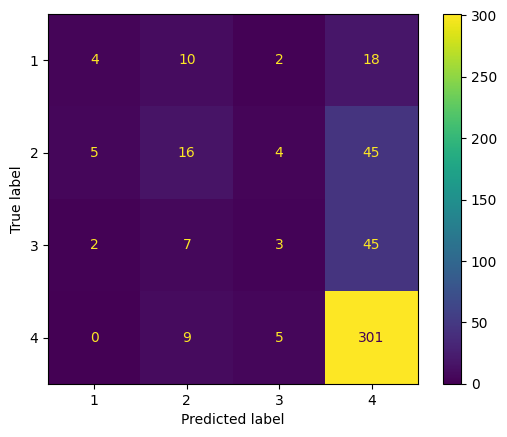

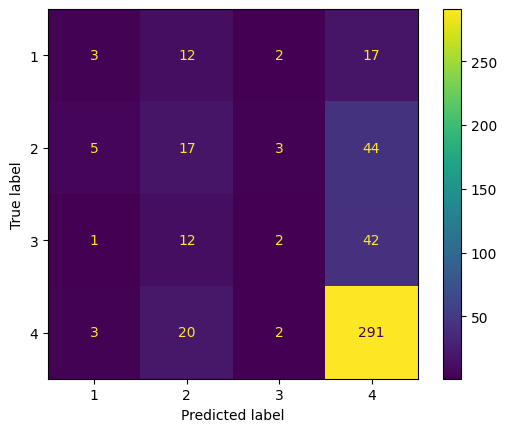

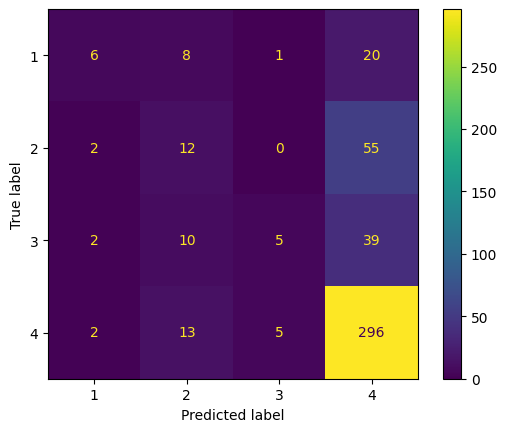

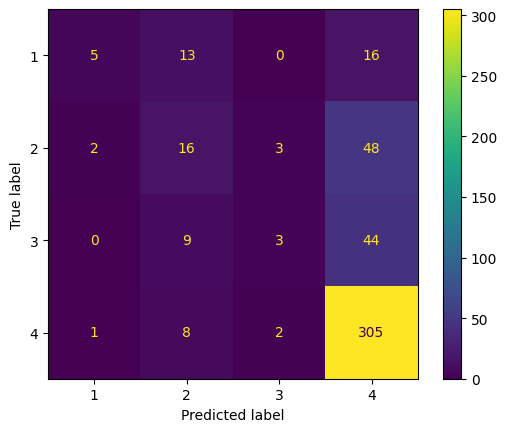

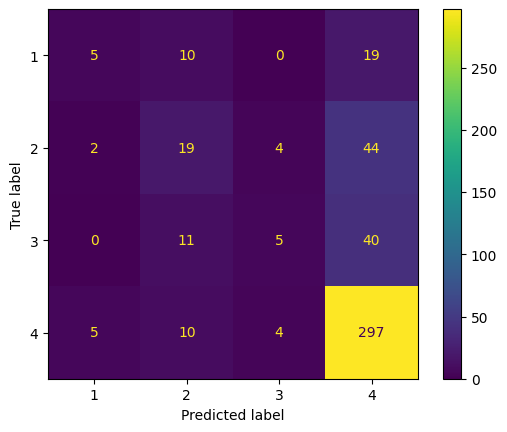

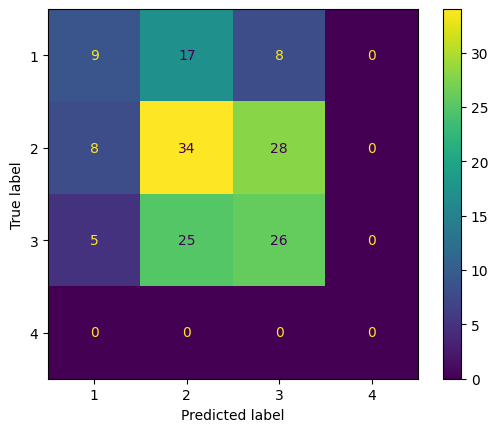

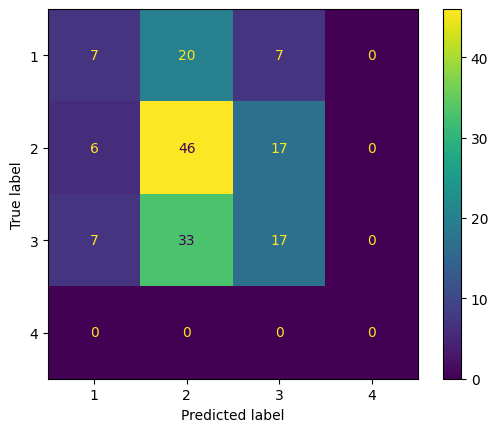

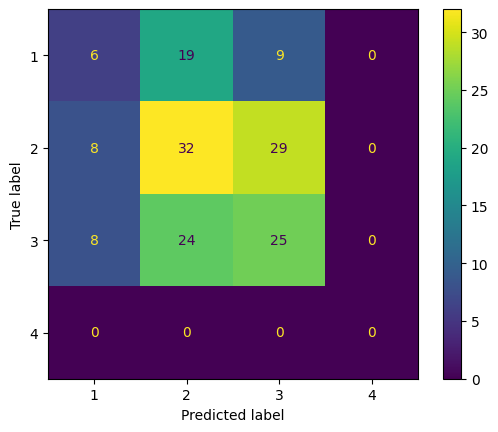

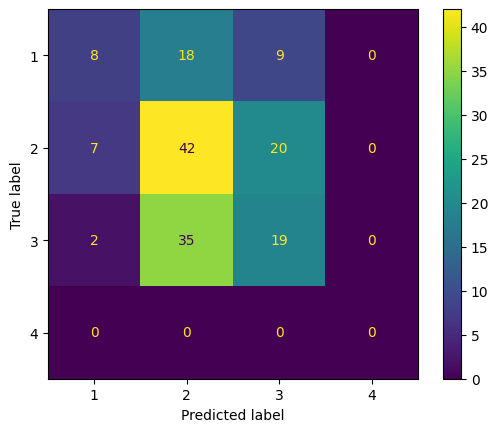

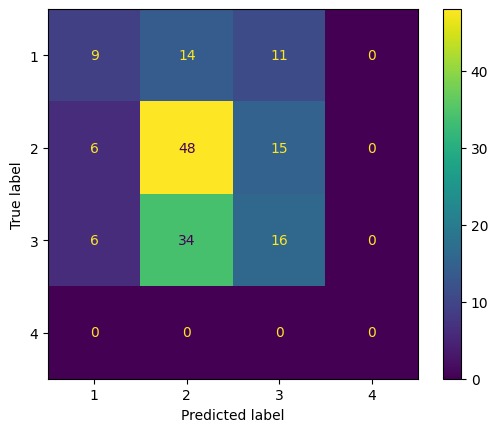

In [5]:
reg = RandomForestClassifier(random_state = SEED,
                            n_estimators = 1600,
                            min_samples_split = 2,
                            min_samples_leaf = 1,
                            max_features = 'sqrt',
                            max_depth = 100,
                            bootstrap = False
)
load_data.two_step(reg, df, train_indices, valid_indices, load_data.gen_oversample_data, True)

## 4. Next Steps

Experiment with Different Preprocessing Strategies:
- Feature Engineering
     - Experiment with the weighting of different features
     - Min/max scaling appears to have been valuable in our Naive Nayes models. Implementing this data preprocessing step for the other models may improve their performance.
     - In this same vein, variance thresholds with overfitted models had some success in predicting diverse categories, as opposed to just 4. 
- Experiment with different ways to address class imbalance:
     - Split the data into binary targets (4 or not-4) to better categorize the non-4 labels. (i.e. multiclass.OneVsRestClassifier)
     - Experiment further with a weighting of different classes
     - Some of our existing models that did show a propensity for classifying classes other than 4 may be useful here as well in concert with other models and techniques

Model Ensembling:
- Determine how to run all models multiple times and average the results to ensure outliers do not unduly influence our results.
- Implement various ensemble modeling strategies including but not limited to:
ADA boost (initial experimentation appears to improve model performance)
Bagging.

With the above techniques, we hope to gain further accuracy at predicting the individual categories over the majority category, and improve our overall F1 scores. 
